In [34]:
run -i metrology.py

Configuration loaded from ./config.yml
  + Red laser parameters:
    - Typical wavelength: 635.0 ± 1.0 nm
    - Wavelength instability: 0.5 nm
    - Peak intensity: 1e+08 counts/s
    - Power imbalance: 20.0 %
------------------------------------------------------------
  + Green laser parameters:
    - Typical wavelength: 532.0 ± 1.0 nm
    - Wavelength instability: 0.5 nm
    - Peak intensity: 1e+08 counts/s
    - Power imbalance: 20.0 %
------------------------------------------------------------
  + Blue laser parameters:
    - Typical wavelength: 405.0 ± 1.0 nm
    - Wavelength instability: 0.5 nm
    - Peak intensity: 1e+08 counts/s
    - Power imbalance: 20.0 %
------------------------------------------------------------
  + Interference sensor parameters:
    - Gain deviation: 0.1 %
    - Phase deviation: 0.1 %
    - Background: 1e1
------------------------------------------------------------
  + ToF sensor parameters:
    - Precision: 10.0 mm
----------------------------------

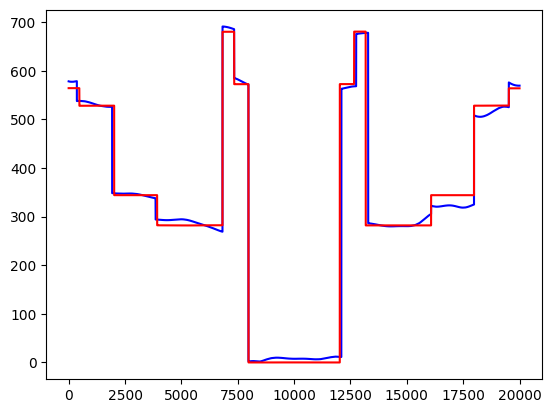

In [36]:
opd=np.arange(-1000,1000,.1)
r,g,b,tof = get_sensors_data(opd)
x_r = (r[0,:,0]-r[0,:,2])/(r[0,:,0]+r[0,:,2])
y_r = (r[0,:,3]-r[0,:,1])/(r[0,:,1]+r[0,:,3])
x_g = (g[0,:,0]-g[0,:,2])/(g[0,:,0]+g[0,:,2])
y_g = (g[0,:,3]-g[0,:,1])/(g[0,:,1]+g[0,:,3])
x_b = (b[0,:,0]-b[0,:,2])/(b[0,:,0]+b[0,:,2])
y_b = (b[0,:,3]-b[0,:,1])/(b[0,:,1]+b[0,:,3])
phi_r=np.arctan2(y_r, x_r)
phi_g=np.arctan2(y_g, x_g)
phi_b=np.arctan2(y_b, x_b)
X_r = (r[0,:,0]+r[0,:,4]-r[0,:,2]-r[0,:,6])/(r[0,:,0]+r[0,:,4]+r[0,:,2]+r[0,:,6])
Y_r = (r[0,:,3]+r[0,:,7]-r[0,:,1]-r[0,:,5])/(r[0,:,1]+r[0,:,5]+r[0,:,3]+r[0,:,7])
X_g = (g[0,:,0]+g[0,:,4]-g[0,:,2]-g[0,:,6])/(g[0,:,0]+g[0,:,4]+g[0,:,2]+g[0,:,6])
Y_g = (g[0,:,3]+g[0,:,7]-g[0,:,1]-g[0,:,5])/(g[0,:,1]+g[0,:,5]+g[0,:,3]+g[0,:,7])
X_b = (b[0,:,0]+b[0,:,4]-b[0,:,2]-b[0,:,6])/(b[0,:,0]+b[0,:,4]+b[0,:,2]+b[0,:,6])
Y_b = (b[0,:,3]+b[0,:,7]-b[0,:,1]-b[0,:,5])/(b[0,:,1]+b[0,:,5]+b[0,:,3]+b[0,:,7])
Phi_r=np.arctan2(Y_r, X_r)
Phi_g=np.arctan2(Y_g, X_g)
Phi_b=np.arctan2(Y_b, X_b)
#plt.plot(np.log(((x_r-x_g)**2. + (y_r-y_g)**2.)**.5))
plt.plot(((
    (phi_r*cfg.r_wavelength/2./np.pi - phi_g*cfg.g_wavelength/2./np.pi)**2.+
    (phi_g*cfg.g_wavelength/2./np.pi - phi_b*cfg.b_wavelength/2./np.pi)**2.+
    (phi_b*cfg.b_wavelength/2./np.pi - phi_r*cfg.r_wavelength/2./np.pi)**2.
)**.5),'b')
plt.plot(((
    (Phi_r*cfg.r_wavelength/2./np.pi - Phi_g*cfg.g_wavelength/2./np.pi)**2.+
    (Phi_g*cfg.g_wavelength/2./np.pi - Phi_b*cfg.b_wavelength/2./np.pi)**2.+
    (Phi_b*cfg.b_wavelength/2./np.pi - Phi_r*cfg.r_wavelength/2./np.pi)**2.
)**.5),'r')
#plt.plot(phi_r*cfg.r_wavelength/2./np.pi)
#plt.plot(phi_g*cfg.g_wavelength/2./np.pi)

In [3]:
print(np.rad2deg(np.arctan2(y_r[0],x_r[0])))
print(np.rad2deg(np.arctan2(y_g[0],x_g[0])))

-153.56874938952868
-43.49590882293035
